# Projeto AceleraDev Data Science: Recomendação de futuros clientes
__Autor:__ André Luís Conradt (andre.conradt@gmail.com)

Importação das bibliotecas necessárias:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from preprocessing import PreProcessing
from modeltrainning import ModelTrainning
from recommendsleads import RecommendsLeads
from elbowtest import ElbowTest 
import seaborn as sns

In [2]:
from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Pré-processamento da base de dados

In [3]:
market = pd.read_csv('../data/estaticos_market.csv')

In [4]:
p = PreProcessing()
market_preprocessing = p.process(market)

Replacing Nan by the mean
Replacing categorical variables with numbers
Normalizing variables
Market database is ready!


## Teste de cotovelo

In [7]:
e = ElbowTest()
distortion = e.elbow(market_preprocessing,20)

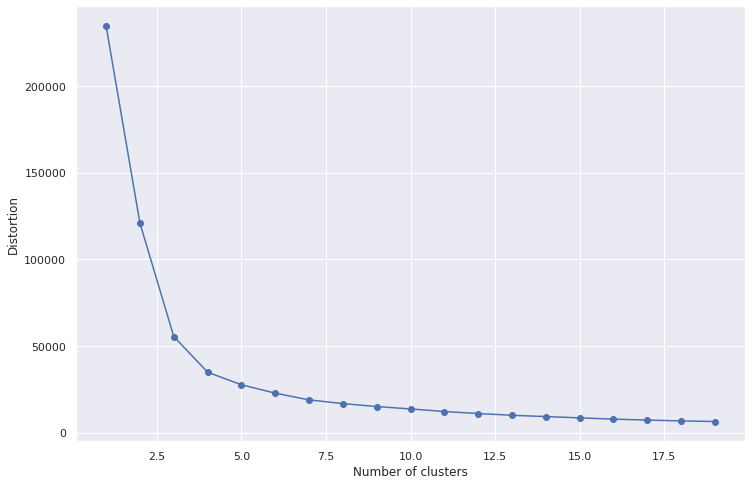

In [8]:
plt.plot(range(1, 20), distortion, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Treinamento do modelo

In [5]:
model = ModelTrainning()
market_cluster = model.trainning(market_preprocessing,1000)

Applying K-Means algorithm
Market database is ready!


In [6]:
market_cluster.to_csv("../output/market_cluster.csv", index = False)

## Visualização dos clusters gerados 

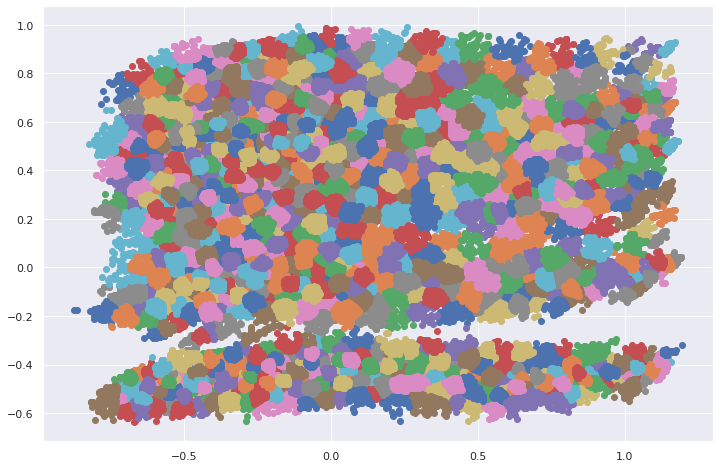

In [7]:
market_plot = market_preprocessing.drop("id", axis = 1)
pca = PCA(n_components=2)
market_pca = pca.fit_transform(market_plot)
for x in range(999):
    plt.scatter(market_pca[market_cluster["cluster"] == x, 0], market_pca[market_cluster["cluster"] == x, 1])
plt.show()

## Possíveis clientes portfolio 1

In [8]:
portfolio_1 = pd.read_csv('../data/estaticos_portfolio1.csv')

In [9]:
r = RecommendsLeads()
client_1 = r.leads(market_cluster, portfolio_1)

In [10]:
client_1.to_csv("../output/client1.csv", index = False)

In [11]:
client_1.shape

(6483,)

## Possíveis clientes portfolio 2

In [12]:
portfolio_2 = pd.read_csv('../data/estaticos_portfolio2.csv')

In [13]:
r = RecommendsLeads()
client_2 = r.leads(market_cluster, portfolio_2)

In [15]:
client_2.to_csv("../output/client2.csv", index = False)

In [14]:
client_2.shape

(384,)

## Possíveis clientes portfolio 3

In [16]:
portfolio_3 = pd.read_csv('../data/estaticos_portfolio3.csv')

In [17]:
r = RecommendsLeads()
client_3 = r.leads(market_cluster, portfolio_3)

In [19]:
client_3.to_csv("../output/client3.csv", index = False)

In [18]:
client_3.shape

(313,)